In [45]:
##NBA All Star API -- making wordclouds

In [46]:
#import libraries
import requests
import json
import re
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
baseURL = "https://newsapi.org/v2/everything?"
total_requests=2
verbose=True

API_KEY='9229666389b949e9a56d780ce7ea446f'
TOPIC='NBA All-Star'

In [48]:
#get data from API
URLpost = {'apiKey': API_KEY,
            'q': '+'+TOPIC,
            'sortBy': 'relevancy',
            'totalRequests': 1}

print(baseURL)

response = requests.get(baseURL, URLpost) #request data from the server
response = response.json() #extract txt data from request into json

print(json.dumps(response, indent=2))

# timestamp for pull request
from datetime import datetime
timestamp = datetime.now().strftime("%Y-%m-%d-H%H-M%M-S%S")

# save to file 
with open(timestamp+'-newapi-raw-data.json', 'w') as outfile:
    json.dump(response, outfile, indent=4)

def string_cleaner(input_string):
    try: 
        out=re.sub(r"""
                    [,.;@#?!&$-]+  # Accept one or more copies of punctuation
                    \ *           # plus zero or more copies of a space,
                    """,
                    " ",          # and replace it with a single space
                    input_string, flags=re.VERBOSE)

        #replace specific chars with nothing
        out = re.sub('[’.]+', '', input_string)

        #elimiate duplicate whitespace w/ wildcards
        out = re.sub(r'\s+', ' ', out)

        #make data chars lowercase
        out=out.lower()
    except:
        print("ERROR")
        out=''
    return out

https://newsapi.org/v2/everything?
{
  "status": "ok",
  "totalResults": 1378,
  "articles": [
    {
      "source": {
        "id": "espn",
        "name": "ESPN"
      },
      "author": "Adrian Wojnarowski",
      "title": "Source: NBA board OKs stricter rest rule, penalty",
      "description": "The NBA Board of Governors approved tougher resting policy rules and punishments for star players that include national TV games, a source told ESPN.",
      "url": "https://www.espn.com/nba/story/_/id/38392750/source-nba-board-governors-approve-tougher-rest-rule",
      "urlToImage": "https://a1.espncdn.com/combiner/i?img=%2Fphoto%2F2016%2F1107%2Fr149917_1296x729_16%2D9.jpg",
      "publishedAt": "2023-09-13T16:50:05Z",
      "content": "The NBA Board of Governors on Wednesday voted to approve new rules strengthening resting policy rules and punishments for star players that include national TV games, in-season tournament games and s\u2026 [+2258 chars]"
    },
    {
      "source": {
    

In [49]:
#clean data & specify the columns source, title, and published-date
article_list=response['articles']
article_keys=article_list[0].keys()
print("AVAILABLE KEYS:")
print(article_keys)
index=0
cleaned_data=[];  
for article in article_list:
    tmp=[]
    if(verbose):
        print("#------------------------------------------")
        print("#",index)
        print("#------------------------------------------")

    for key in article_keys:
        if(verbose):
            print("----------------")
            print(key)
            print(article[key])
            print("----------------")

        if(key=='source'):
            src=string_cleaner(article[key]['name'])
            tmp.append(src) 

        if(key=='title'):
            tmp.append(string_cleaner(article[key]))

        if(key=='description'):
            tmp.append(string_cleaner(article[key]))

    cleaned_data.append(tmp)
    index+=1

AVAILABLE KEYS:
dict_keys(['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])
#------------------------------------------
# 0
#------------------------------------------
----------------
source
{'id': 'espn', 'name': 'ESPN'}
----------------
----------------
author
Adrian Wojnarowski
----------------
----------------
title
Source: NBA board OKs stricter rest rule, penalty
----------------
----------------
description
The NBA Board of Governors approved tougher resting policy rules and punishments for star players that include national TV games, a source told ESPN.
----------------
----------------
url
https://www.espn.com/nba/story/_/id/38392750/source-nba-board-governors-approve-tougher-rest-rule
----------------
----------------
urlToImage
https://a1.espncdn.com/combiner/i?img=%2Fphoto%2F2016%2F1107%2Fr149917_1296x729_16%2D9.jpg
----------------
----------------
publishedAt
2023-09-13T16:50:05Z
----------------
----------------
content
The NBA

In [50]:
#save to csv
df = pd.DataFrame(cleaned_data)
print(df)
df.to_csv('NBA_All_Star_cleaned.csv', index=False)

                      0                                                  1  \
0                  espn  source: nba board oks stricter rest rule, penalty   
1              deadspin               dwight howard is still salty as hell   
2                  time  magic johnson has declined multiple nba owners...   
3              bbc news  idris elba: actors in video games like phantom...   
4                  espn      sources: lebron, ad, curry eyeing paris games   
..                  ...                                                ...   
95  nbcsportschicagocom  should the bulls sign demar derozan to an exte...   
96   al jazeera english  ‘more than basketball: south sudan go from und...   
97           fox sports  james harden reportedly missed all-star game s...   
98               forbes  marvin bagley is nearing his make-or-break tim...   
99          gq magazine  jerry west still isn't totally sure that's him...   

                                                    2  
0   the

In [56]:
import wikipedia
import matplotlib.pyplot as plt
import numpy as np
import csv
from wordcloud import WordCloud, STOPWORDS

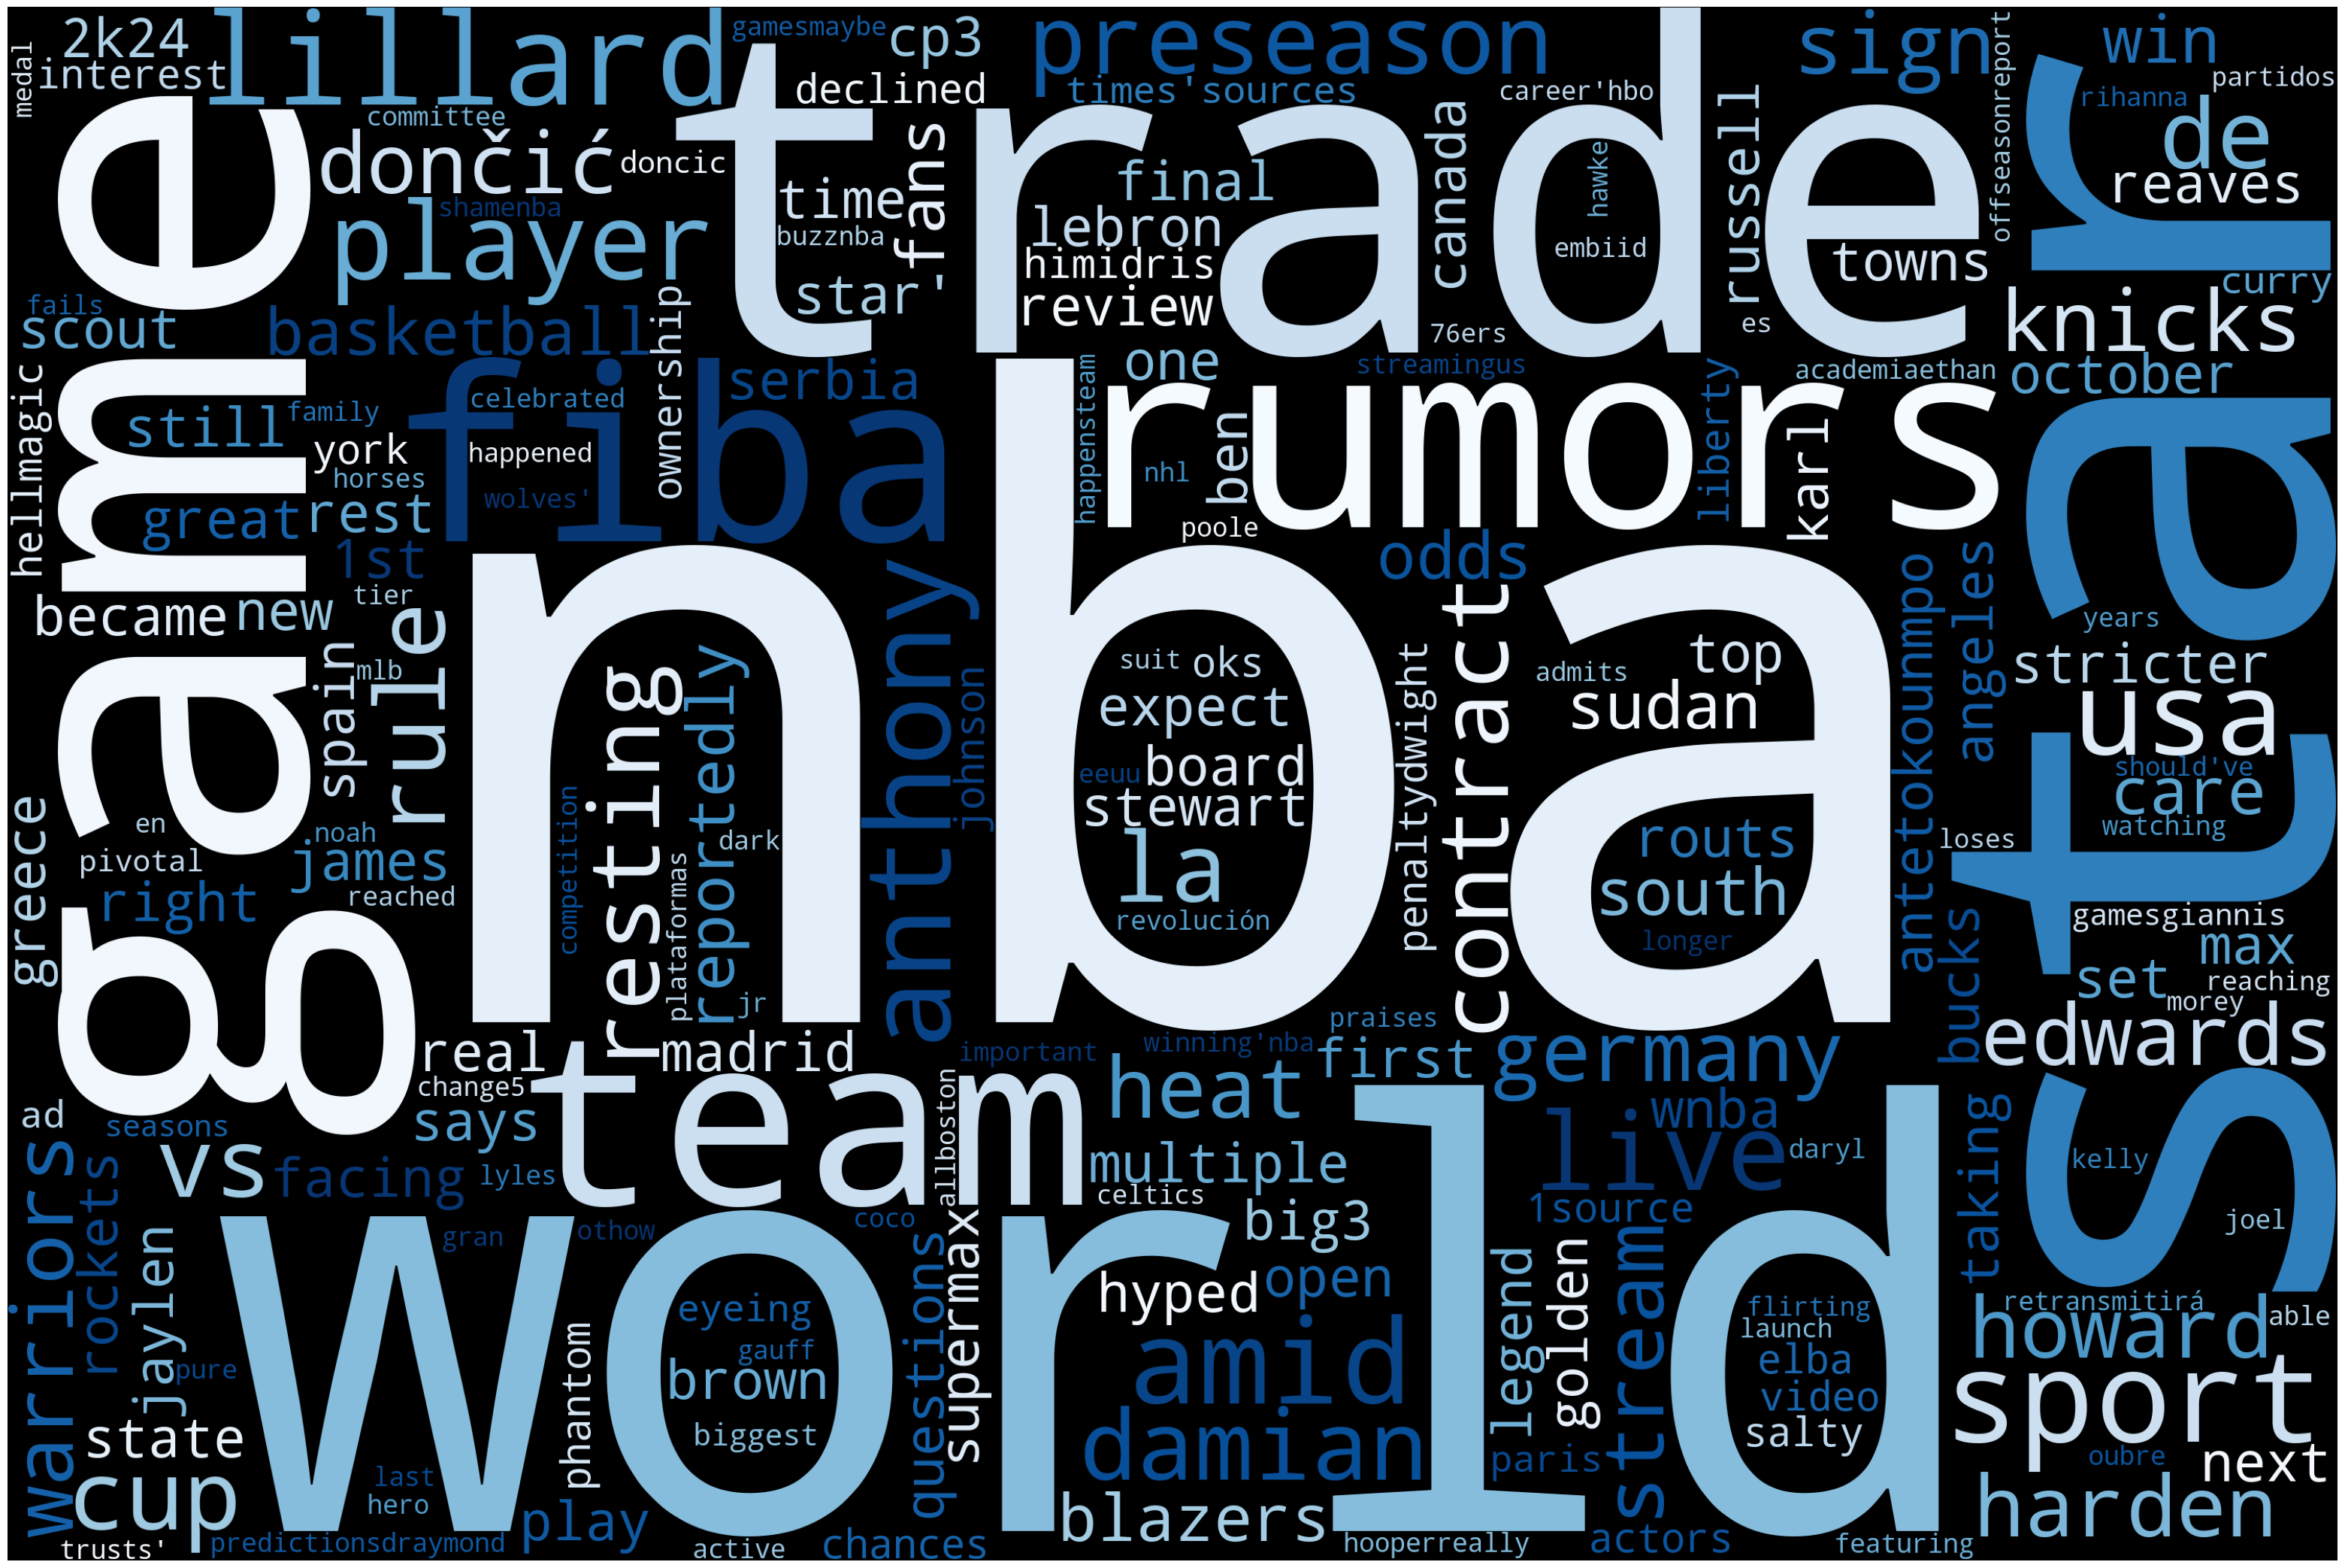

In [70]:
# make wordcloud
my_text = []
with open('NBA_All_Star_cleaned.csv', 'r') as f:
    reader = csv.reader(f)
    my_text = ''.join([i[1] for i in reader])

def plot_cloud(wordcloud):
        # Set figure size
        plt.figure(figsize=(40, 30))
        # Display image
        plt.imshow(wordcloud) 
        # No axis details
        plt.axis("off");

# lower max_font_size
wordcloud = wordcloud = WordCloud(
    width = 3000,
    height = 2000, 
    random_state=1, 
    background_color='black', 
    colormap='Blues', 
    collocations=False,
    stopwords = STOPWORDS).generate(my_text)

plot_cloud(wordcloud)
plt.show()